## Sample Table Dataset

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from pprint import pprint

In [207]:
data = {'ER': [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], 
        'FH': [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
        'S':  [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0],
        'LC': [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
        'LH': [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0],
        'A':  [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]}  
df = pd.DataFrame(data)  
target = "A"

In [208]:
df.head()

,ER,FH,S,LC,LH,A
0,1,1,0,0,1,1
1,1,1,1,0,1,1
2,0,0,1,0,0,0
3,0,1,1,0,1,0
4,0,1,1,0,0,1


In [209]:
df.shape

(14, 6)

In [210]:
print(df)

    ER  FH  S  LC  LH  A
0    1   1  0   0   1  1
1    1   1  1   0   1  1
2    0   0  1   0   0  0
3    0   1  1   0   1  0
4    0   1  1   0   0  1
5    0   0  1   1   1  1
6    1   0  0   0   1  0
7    0   1  0   1   1  1
8    0   0  1   0   1  1
9    1   0  0   0   0  0
10   1   1  1   0   0  1
11   0   1  1   1   1  0
12   0   0  0   0   1  0
13   1   0  0   1   0  1


In [211]:
X = df.drop(['A'], axis=1)

y = df['A']

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [213]:
X_train.shape, X_test.shape

((10, 5), (4, 5))

In [214]:
X_train.head()

,ER,FH,S,LC,LH
5,0,0,1,1,1
8,0,0,1,0,1
2,0,0,1,0,0
1,1,1,1,0,1
13,1,0,0,1,0


In [215]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [216]:
y_pred_en = clf_en.predict(X_test)

In [217]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5000


In [218]:
y_pred_train_en = clf_en.predict(X_train)


In [219]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8000
Test set score: 0.5000


[Text(372.0, 380.52, 'X[1] <= 0.5\nentropy = 0.985\nsamples = 14\nvalue = [6, 8]'),
 Text(223.20000000000002, 271.8, 'X[3] <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(148.8, 163.07999999999998, 'X[2] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(223.20000000000002, 54.360000000000014, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(297.6, 163.07999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(520.8000000000001, 271.8, 'X[0] <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(446.40000000000003, 163.07999999999998, 'X[4] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(372.0, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(520.8000000000001, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(595.2, 163.07999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

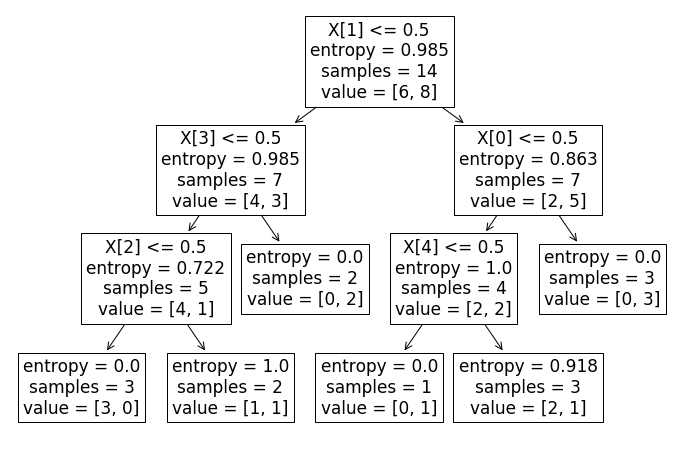

In [220]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X, y)) 

Calculate Entropy of column

In [221]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
entropy(df["A"])

0.9852281360342515

Calculate the information gain of a dataset. This function takes three parameters:
1. data = The dataset for whose feature the IG should be calculated
2. split_attribute_name = the name of the feature for which the information gain should be calculated
3. target_name = the name of the target feature. The default for this example is "class"
    
Calculate the entropy of the total dataset
Calculate the entropy of the dataset
Calculate the values and the corresponding counts for the split attribute 
Calculate the weighted entropy
Calculate the information gain

In [222]:
def InfoGain(data,split_attribute_name,target_name=target):

    total_entropy = entropy(data[target_name])
    

    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
entropy(df)

1.0

In [223]:
def ID3(data,originaldata,features,target_attribute_name=target,parent_node_class = None):


    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    

    elif len(features) ==0:
        return parent_node_class
    
    
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)

        best_feature = features[best_feature_index]
        
        tree = {best_feature:{}}
                
        features = [i for i in features if i != best_feature]                
        
        for value in np.unique(data[best_feature]):
            value = value
            
            sub_data = data.where(data[best_feature] == value).dropna()
                        
            subtree = ID3(sub_data,data,features,target_attribute_name,parent_node_class)
            
            tree[best_feature][value] = subtree
            
        return(tree)   



In [232]:
def GainRatio(data,split_attribute_name,target_name=target):
    InformationGain = InfoGain(data,split_attribute_name,target_name=target)
    
    #Calculate splitInfo
    elements,counts = np.unique(data[target_name],return_counts = True)
    splitInfo = np.sum([(-counts[i]/len(data))*np.log2(counts[i]/len(data)) for i in range(len(elements))])
    
    gainRatio = InformationGain/splitInfo
    return gainRatio

In [225]:
def C4(data,originaldata,features,target_attribute_name=target,parent_node_class = None):

    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
        
    elif len(features) ==0:
        return parent_node_class
        
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        item_values = [GainRatio(data,feature,target_attribute_name) for feature in features] #Return the Gain Ratio values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature:{}}
        
        features = [i for i in features if i != best_feature]
                
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            
            subtree = C4(sub_data,data,features,target_attribute_name,parent_node_class)
            
            tree[best_feature][value] = subtree
            
        return(tree)   

In [226]:
def predict(query,tree,default = 1):

    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

In [227]:
def train_test_split(dataset):
    training_data = dataset.iloc[:10].reset_index(drop=True)
    testing_data = dataset.iloc[10:].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(df)[0]
testing_data = train_test_split(df)[1] 
print(training_data,'\n', testing_data)
print(data) 

   ER  FH  S  LC  LH  A
0   1   1  0   0   1  1
1   1   1  1   0   1  1
2   0   0  1   0   0  0
3   0   1  1   0   1  0
4   0   1  1   0   0  1
5   0   0  1   1   1  1
6   1   0  0   0   1  0
7   0   1  0   1   1  1
8   0   0  1   0   1  1
9   1   0  0   0   0  0 
    ER  FH  S  LC  LH  A
0   1   1  1   0   0  1
1   0   1  1   1   1  0
2   0   0  0   0   1  0
3   1   0  0   1   0  1
{'ER': [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], 'FH': [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], 'S': [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0], 'LC': [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1], 'LH': [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0], 'A': [1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1]}


In [228]:
def test(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data[target])/len(data))*100,'%')

In [229]:
tree = ID3(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'LC': {0: {'FH': {0.0: {'ER': {0.0: {'LH': {0.0: 0.0, 1.0: 1.0}}, 1.0: 0.0}},
                   1.0: {'ER': {0.0: {'LH': {0.0: 1.0, 1.0: 0.0}}, 1.0: 1.0}}}},
        1: 1.0}}
The prediction accuracy is:  50.0 %


In [230]:
tree = C4(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'LC': {0: {'FH': {0.0: {'ER': {0.0: {'LH': {0.0: 0.0, 1.0: 1.0}}, 1.0: 0.0}},
                   1.0: {'ER': {0.0: {'LH': {0.0: 1.0, 1.0: 0.0}}, 1.0: 1.0}}}},
        1: 1.0}}
The prediction accuracy is:  50.0 %
